## **Importing Libraries**
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import warnings

## **Raw information**
---

In [2]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## **Statistic information**
---

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## **Data Cleaning**
---

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df = df.drop(columns=["Cabin"])
warnings.filterwarnings("ignore", category=FutureWarning)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## **Data Visualization**
---

### Survival Rate by Gender

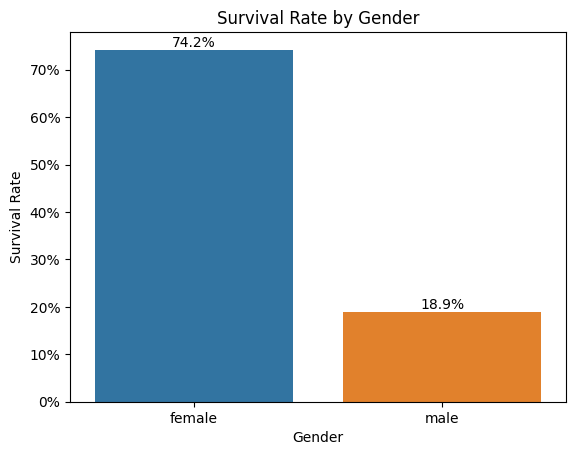

In [6]:
survival = df.groupby("Sex")["Survived"].mean() * 100
grph = sns.barplot(x = survival.index, y = survival.values)
for i in grph.patches:
    grph.annotate(f'{i.get_height():.1f}%',
                 (i.get_x() + i.get_width() / 2, i.get_height()),
                 ha='center',va='bottom',fontsize='10')
grph.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{y:.0f}%'))

plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.show()

### Survival Rate by Passenger Class

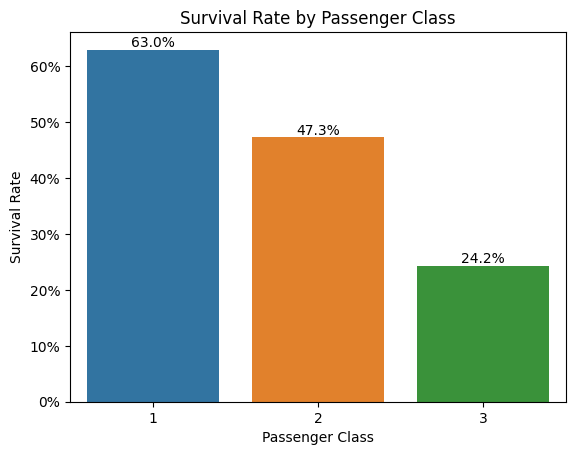

In [7]:
survival_rates = df.groupby("Pclass")["Survived"].mean() * 100
ax = sns.barplot(x=survival_rates.index, y=survival_rates.values)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{y:.0f}%'))

plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.xlabel("Passenger Class")
plt.show()

### Age Distribution of Survivors vs Non-Survivors

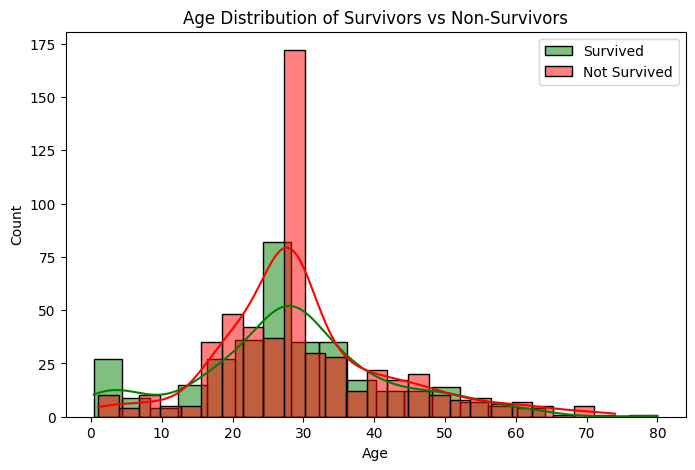

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df[df["Survived"] == 1]["Age"], color ="green", label="Survived",kde=True)
sns.histplot(df[df["Survived"] == 0]["Age"], color="red", label="Not Survived", kde=True)
plt.legend()
plt.title("Age Distribution of Survivors vs Non-Survivors")
plt.show()